In [1]:
# !ls -hl|grep csv
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from time import time, ctime
from sklearn.metrics import accuracy_score, classification_report, classification, confusion_matrix
from sklearn.model_selection import train_test_split, KFold, cross_val_score, StratifiedKFold, StratifiedShuffleSplit
from helper import plot_confusion_matrix, plot_confusion_matrix2
dim=lambda *x: [i.shape for i in x]

import warnings
warnings.filterwarnings("ignore")

In [2]:
%%time
df = pd.read_csv('./preprocessed.csv')
print df.shape

(49260, 748)
CPU times: user 2.74 s, sys: 236 ms, total: 2.97 s
Wall time: 2.97 s


In [3]:
X = df.iloc[:,2:].values
print X.shape
y = df.iloc[:,1].map({'male':1,'female':0}).values
print y.shape
df.head(1)

(49260, 746)
(49260,)


,username,fname.gender,username_split_predict,last,last_two,first,first2,nchar,vowels.pct,digits.pct,...,feature_721,feature_722,feature_723,feature_724,feature_725,feature_726,feature_727,feature_728,feature_729,feature_730
0,billion,male,unknow,n,on,b,bi,7,0.428571,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,14.0,7.0


In [4]:
%%time
# Encoding the Independent Variable
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

for i in range(5):
    i=str(i)
    exec("labelencoder_X_{} = LabelEncoder()".format(i))
    exec("X[:, {}] = labelencoder_X_{}.fit_transform(X[:, {}])".format(i,i,i))

CPU times: user 140 ms, sys: 0 ns, total: 140 ms
Wall time: 140 ms


In [5]:
%%time
print X.shape
onehotencoder = OneHotEncoder(categorical_features = range(6))
X = onehotencoder.fit_transform(X).toarray()
print X.shape

(49260, 746)
(49260, 4505)
CPU times: user 1.32 s, sys: 463 ms, total: 1.79 s
Wall time: 1.78 s


In [6]:
%%time
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
# fit on training set
X = sc.fit_transform(X)
print X.shape

(49260, 4505)
CPU times: user 2.88 s, sys: 1.52 s, total: 4.41 s
Wall time: 4.4 s


https://rasbt.github.io/mlxtend/user_guide/classifier/StackingClassifier/

In [7]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier

from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier,\
ExtraTreesClassifier, GradientBoostingClassifier, VotingClassifier, RandomForestClassifier

from mlxtend.classifier import StackingClassifier

import numpy as np

In [8]:
ctime()

'Sat Nov 11 12:25:56 2017'

In [ ]:
%%time
clf1 = AdaBoostClassifier()
clf2 = RandomForestClassifier(random_state=1, n_estimators=320, min_samples_split=4, n_jobs=-1)
clf3 = XGBClassifier(nthread=-1, max_depth=24,
                        min_child_weight=0.9, colsample_bytree=0.9,
                       scale_pos_weight= 0.9, reg_alpha=0.6)
clf4 = BaggingClassifier(n_jobs=-1, n_estimators=50)
clf5 = ExtraTreesClassifier(n_jobs=-1, bootstrap=True, n_estimators=100)

lr = LogisticRegression(solver='lbfgs', n_jobs=-1)

sclf = StackingClassifier(classifiers=[clf1, clf2, clf3, clf4, clf5], 
                          meta_classifier=lr)

print('5-fold cross validation:\n')

if __name__ == '__main__':
    stack1=[]
    for clf, label in zip([clf1, clf2, clf3, clf4, clf5,  sclf], 
                          ['AdaBoost', 
                           'Random Forest', 
                           'Xgboost',
                           'Bagging',
                           'ExtraTrees',
                           'Stacking']):

        scores = model_selection.cross_val_score(clf, X, y, 
#                                                  n_jobs=-1,
                                                  cv=5, scoring='accuracy')
        stack1.append([label, scores, scores.mean(), scores.std()])
        print("Accuracy: %0.4f (+/- %0.4f) [%s]" 
              % (scores.mean(), scores.std(), label))

5-fold cross validation:

Accuracy: 0.8237 (+/- 0.0008) [AdaBoost]
Accuracy: 0.8244 (+/- 0.0013) [Random Forest]
Accuracy: 0.8298 (+/- 0.0019) [Xgboost]
Accuracy: 0.8269 (+/- 0.0019) [Bagging]
Accuracy: 0.8268 (+/- 0.0012) [ExtraTrees]


In [9]:
S1_time = ctime()
S1_time

In [10]:
%%time
clf1 = AdaBoostClassifier()
clf2 = RandomForestClassifier(random_state=1, n_estimators=320, min_samples_split=4, n_jobs=-1)
clf3 = XGBClassifier(nthread=-1, max_depth=24,
                        min_child_weight=0.9, colsample_bytree=0.9,
                       scale_pos_weight= 0.9, reg_alpha=0.6)
clf4 = BaggingClassifier(n_jobs=-1, n_estimators=50)
clf5 = ExtraTreesClassifier(n_jobs=-1, bootstrap=True, n_estimators=100)

lr = LogisticRegression(solver='lbfgs', n_jobs=-1)

sclf = StackingClassifier(classifiers=[clf1, clf2, clf3, clf4, clf5], 
                          meta_classifier=lr, 
                         use_probas=True,
                          average_probas=False)

print('5-fold cross validation:\n')

if __name__ == '__main__':
    
    stack2 = []
    for clf, label in zip([clf1, clf2, clf3, clf4, clf5,  sclf], 
                          ['AdaBoost', 
                           'Random Forest', 
                           'Xgboost',
                           'Bagging',
                           'ExtraTrees',
                           'Stacking']):

        scores = model_selection.cross_val_score(clf, X, y, 
#                                                  n_jobs=-1,
                                                  cv=5, scoring='accuracy')
        stack2.append([label, scores, scores.mean(), scores.std()])
        print("Accuracy: %0.4f (+/- %0.4f) [%s]" 
              % (scores.mean(), scores.std(), label))

5-fold cross validation:

Accuracy: 0.8237 (+/- 0.0008) [AdaBoost]
Accuracy: 0.8244 (+/- 0.0013) [Random Forest]
Accuracy: 0.8298 (+/- 0.0019) [Xgboost]
Accuracy: 0.8264 (+/- 0.0023) [Bagging]
Accuracy: 0.8272 (+/- 0.0011) [ExtraTrees]
Accuracy: 0.8311 (+/- 0.0020) [Stacking]
CPU times: user 10h 44min 10s, sys: 1min 47s, total: 10h 45min 57s
Wall time: 1h 31min 13s


In [11]:
S2_time = ctime()
S2_time

'Sat Nov 11 13:57:30 2017'

In [12]:
stack1

NameError: name 'stack1' is not defined

In [13]:
stack2

[['AdaBoost',
  array([ 0.82330255,  0.82511165,  0.8226756 ,  0.82369062,  0.8234697 ]),
  0.82365002369368789,
  0.00080507980493064015],
 ['Random Forest',
  array([ 0.82299807,  0.82592367,  0.82511165,  0.82521315,  0.82275911]),
  0.82440113197399723,
  0.0012764916941748496],
 ['Xgboost',
  array([ 0.82989952,  0.8317093 ,  0.8316078 ,  0.82917174,  0.82661659]),
  0.82980098897816001,
  0.001868275523513574],
 ['Bagging',
  array([ 0.82441896,  0.82866423,  0.82978076,  0.82490865,  0.82438331]),
  0.82643118076233546,
  0.0023137447252085611],
 ['ExtraTrees',
  array([ 0.82655029,  0.82815672,  0.82886724,  0.82632968,  0.82621054]),
  0.82722289200665355,
  0.0010817563474096203],
 ['Stacking',
  array([ 0.83132041,  0.83313033,  0.83333333,  0.82937475,  0.82844381]),
  0.83112052625665422,
  0.0019589955556769257]]

### trainning real model

In [14]:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=.3, stratify =y, 
                                                  random_state=7)
print dim(X_train, y_train, X_test, y_test )

[(34482, 4505), (34482,), (14778, 4505), (14778,)]


In [15]:
clf1 = AdaBoostClassifier()
clf2 = RandomForestClassifier(random_state=1, n_estimators=320, min_samples_split=4, n_jobs=-1)
clf3 = XGBClassifier(nthread=-1, max_depth=24,
                        min_child_weight=0.9, colsample_bytree=0.9,
                       scale_pos_weight= 0.9, reg_alpha=0.6)
clf4 = BaggingClassifier(n_jobs=-1, n_estimators=50)
clf5 = ExtraTreesClassifier(n_jobs=-1, bootstrap=True, n_estimators=100)

lr = LogisticRegression(solver='lbfgs', n_jobs=-1)

sclf = StackingClassifier(classifiers=[clf1, clf2, clf3, clf4, clf5], 
                          meta_classifier=lr, 
                         use_probas=True,
                          average_probas=False)

In [16]:
%%time
sclf.fit(X=X_train, y=y_train)

CPU times: user 1h 3min 42s, sys: 9.56 s, total: 1h 3min 52s
Wall time: 8min 24s


StackingClassifier(average_probas=False,
          classifiers=[AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None), RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            mi...imators=100, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)],
          meta_classifier=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=-1,
          penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False),
          use_features_in_secondary=False, use_probas=True, verbose=0)

In [17]:
%%time
pred = sclf.predict(X_test)
print pred

[1 1 1 ..., 1 1 1]
CPU times: user 31.3 s, sys: 1.48 s, total: 32.8 s
Wall time: 27.2 s


In [18]:
accuracy_score(y_test, pred)

0.83495736906211937

Confusion matrix, without normalization
[[  527  2134]
 [  305 11812]]


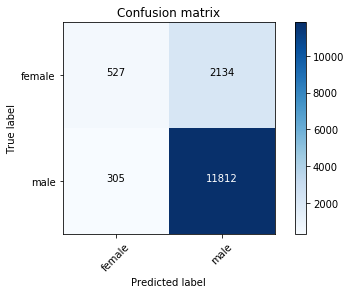

In [20]:
plot_confusion_matrix(confusion_matrix(y_test, pred), classes=['female','male'])